In [202]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [203]:
test = pd.read_csv('mnist_test.csv', header=None)
train = pd.read_csv('mnist_train.csv', header=None)

/var/folders/fy/xnq7gvy17dg1qvx0z4k6w5_h0000gn/T/ipykernel_3229/2533622602.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,25

In [204]:
column_types = train.dtypes
print(column_types)
print(train.head())

0      object
1      object
2      object
3      object
4      object
        ...  
780    object
781    object
782    object
783    object
784    object
Length: 785, dtype: object
     0    1    2    3    4    5    6    7    8    9    ...    775    776   
0  label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
1      5    0    0    0    0    0    0    0    0    0  ...      0      0   
2      0    0    0    0    0    0    0    0    0    0  ...      0      0   
3      4    0    0    0    0    0    0    0    0    0  ...      0      0   
4      1    0    0    0    0    0    0    0    0    0  ...      0      0   

     777    778    779    780    781    782    783    784  
0  28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[

In [205]:
train = train.iloc[1:].astype(int)
test = test.iloc[1:].astype(int)
print(train.head())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778   
1    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0  \
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
5    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  
5    0    0    0    0    0    0  

[5 rows x 785 columns]


In [206]:
train = train.drop(0, axis=1)
test = test.drop(0, axis=1)
print(train.head())

   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0  \
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
5    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  
5    0    0    0    0    0    0  

[5 rows x 784 columns]


In [207]:
# import numpy as np

# # Calculate the number of rows to add noise to
# num_rows = int(0.5 * len(train))

# # Generate random row indices to add noise to
# noise_indices = np.random.choice(len(train), num_rows, replace=False)

# # Add noise to the selected rows
# train.iloc[noise_indices] += np.random.normal(0, 8, size=train.shape[1])



In [208]:
import matplotlib.pyplot as plt
def visualize_digit(dataset, index):
    digit = dataset[index].reshape(28, 28)
    plt.imshow(digit, cmap='gray')
    plt.axis('off')
    plt.show()

def visualize_digit_from_1D(dataset):
    digit = dataset.reshape(28, 28)
    plt.imshow(digit, cmap='gray')
    plt.axis('off')
    plt.show()

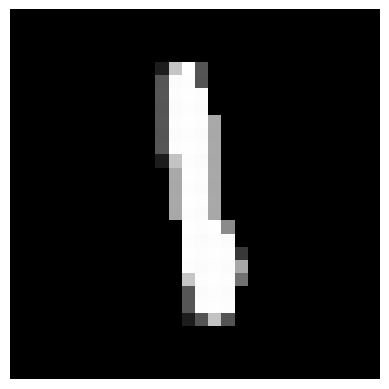

In [209]:
visualize_digit(train.values, 200)

In [210]:
def PCA(X,dim):

  cov = np.cov(X.T)

  eigenvalues, eigenvectors  = np.linalg.eig(cov)
  eigenvectors = eigenvectors.T

  inds = np.argsort(eigenvalues)[::-1]
  eigenvalues_sorted = eigenvalues[inds]
  eigenvectors = eigenvectors[inds]

  components = eigenvectors[:dim]
  X_transformed = np.dot(X, components.T)

  return X_transformed, components.T

In [211]:
rd = 64
Xtr,eig=PCA(train,rd)
print(Xtr.shape)
reconstructed = np.dot(Xtr, eig.T)
print(reconstructed.shape)

(60000, 64)
(60000, 784)


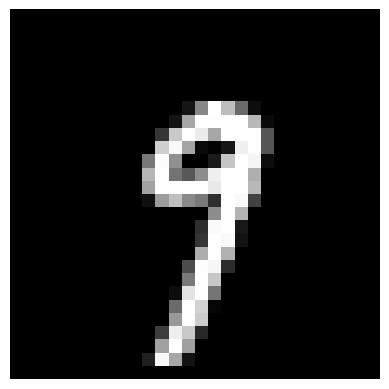

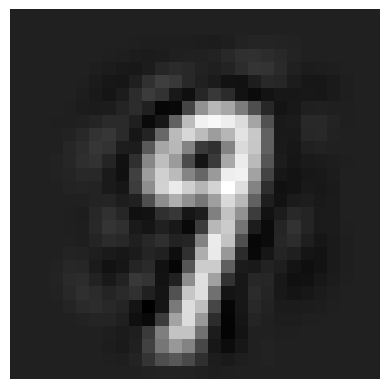

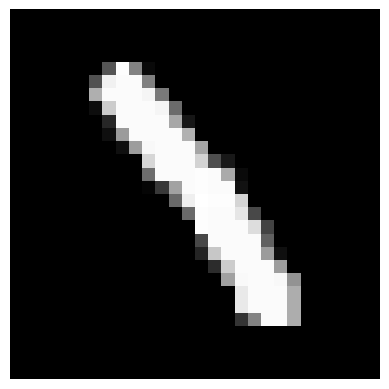

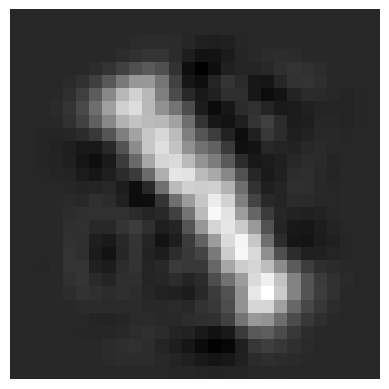

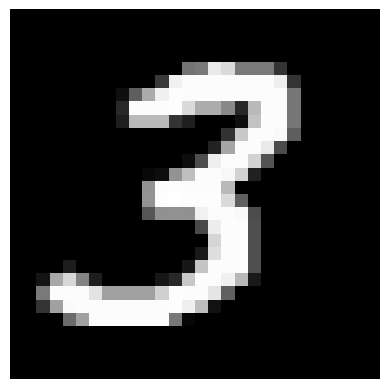

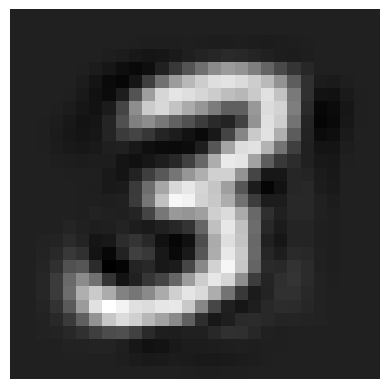

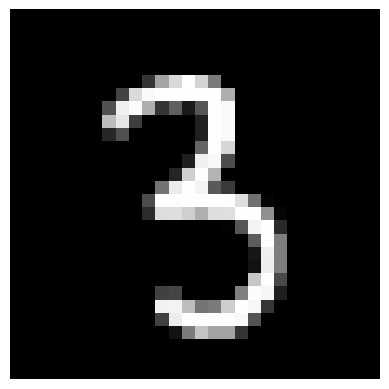

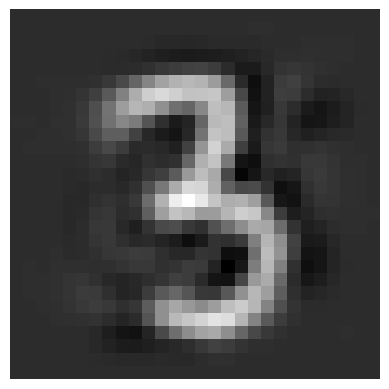

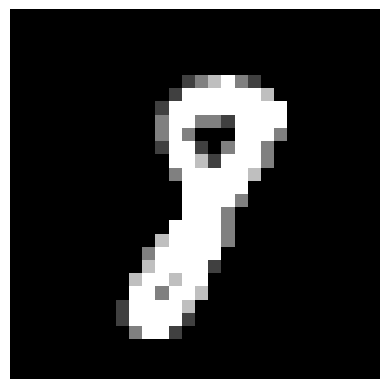

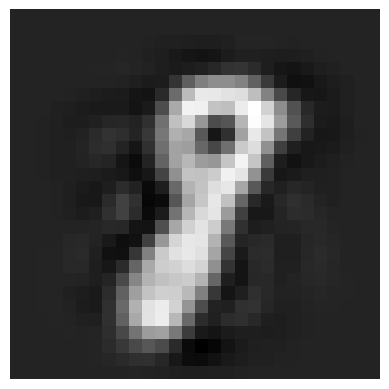

In [212]:
for i in range(133,138):
    visualize_digit(train.values, i)
    visualize_digit(np.real(reconstructed), i)


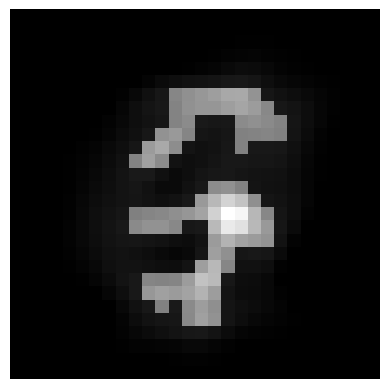

In [213]:
import numpy as np

# Set the mean and standard deviation for the normal distribution
mean = 0
std_dev = 1
random_value = np.random.normal(mean, std_dev)
random_array = np.full(rd, random_value)


mean_image = np.mean(train, axis=0)

coefficients = np.random.normal(0, 1, size=(rd,))
generated_image = mean_image*0.7 + ((np.dot(coefficients, eig.T)))*mean_image.mean()*1.2

# Set the threshold for determining whiter and darker pixels
threshold = mean_image.mean()*2.2

# Convert whiter pixels to complete white and darker pixels to complete black
generated_image[generated_image > threshold] = generated_image * 5
generated_image[generated_image <= mean_image.mean()*0.1] = 0

# Display the modified generated_image
visualize_digit_from_1D(np.real(generated_image))

In [214]:
print(train.shape)

(60000, 784)


In [215]:
mu = np.mean(train, axis=0)
print(mu.size)

784


In [216]:
def PPCA(X,dim):

  cov = np.cov(X.T)

  eigenvalues, eigenvectors  = np.linalg.eig(cov)
  eigenvectors = eigenvectors.T

  inds = np.argsort(eigenvalues)[::-1]
  eigenvalues_sorted = eigenvalues[inds]
  eigenvectors = eigenvectors[inds]
  eigenvalues_sorted_d = eigenvalues_sorted[:dim]
  components = eigenvectors[:dim]
  X_transformed = np.dot(X, components.T)
  lamsum = np.sum(eivals[rd:])
  sigma_sq = lamsum / (X.shape[1] - rd)
  return eigenvalues_sorted_d, sigma_sq, X_transformed, components.T

eivals, sigma_sq, Xtr,eig = PPCA(train,rd)
print(sigma_sq)

0j


In [217]:
Lm = eivals * np.eye(rd)
Wml = eig @ np.sqrt(Lm - (sigma_sq * np.eye(rd)))
print(Wml.shape)

(784, 64)


In [218]:
first_row_test = test.iloc[0]
print(first_row_test.shape)


(784,)


In [219]:
M = np.dot(Wml.T, Wml) + (sigma_sq * np.eye(Wml.shape[1]))
print(M.shape)

(64, 64)


In [220]:
mean_pzx = np.linalg.inv(M) @ Wml.T @ (test.iloc[0] - mu)
print(mean_pzx.shape)


samples = np.random.multivariate_normal(mean_pzx, sigma_sq*np.linalg.inv(M), size=1000)
print(samples[0])

(64,)


/var/folders/fy/xnq7gvy17dg1qvx0z4k6w5_h0000gn/T/ipykernel_3229/1589360698.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  samples = np.random.multivariate_normal(mean_pzx, sigma_sq*np.linalg.inv(M), size=1000)


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

In [ ]:
mean_pxz = Wml @ samples[0] + mu
if np.iscomplexobj(mean_pxz):
    mean_pxz = np.real(mean_pxz)
samplesx = np.random.multivariate_normal(mean_pxz, sigma_sq*np.eye(train.shape[1]), size=5)
print(samplesx[0].size)

/var/folders/fy/xnq7gvy17dg1qvx0z4k6w5_h0000gn/T/ipykernel_3229/1890649846.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  samplesx = np.random.multivariate_normal(mean_pxz, sigma_sq*np.eye(train.shape[1]), size=5)


784


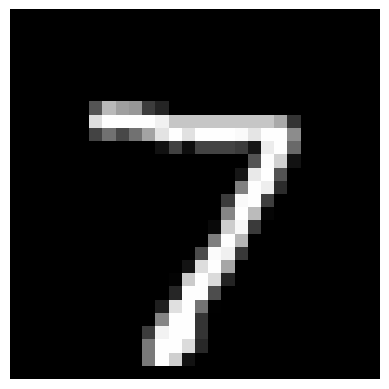

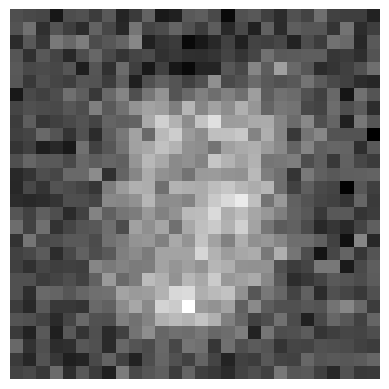

In [ ]:
visualize_digit_from_1D(np.array(test.iloc[0]))
visualize_digit_from_1D(samplesx[0])